In [5]:
import sklearn
import numpy as np``

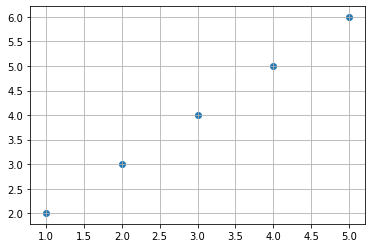

In [8]:
import matplotlib.pyplot as plt
data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x=data[:,0]
y=data[:,1]

plt.scatter(x,y)
plt.grid(True)
plt.show()


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

content = ["How to format my hard drive", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print(X)

vectorizer.get_feature_names()

X.toarray()[0]

  (0, 4)	1
  (0, 7)	1
  (0, 2)	1
  (0, 5)	1
  (0, 3)	1
  (0, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 0)	1
  (1, 6)	1


array([0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [17]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

trains_counts = vectorizer.fit_transform(twenty_train.data)

vectorizer.vocabulary_.get('algorithm')

len(vectorizer.get_feature_names())

vectorizer = CountVectorizer(stop_words='english')

sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [2]:
import nltk

s = nltk.stem.SnowballStemmer('english')

s.stem('cats')

from nltk.tokenize import word_tokenize
nltk.download('punkt')
text = word_tokenize("And now for something completely different")

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)


['And', 'now', 'for', 'something', 'completely', 'different']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nickf\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\nickf\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
analyze = vectorizer.build_analyzer()
analyze('John bought carrots and potatoes')

import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = StemmedCountVectorizer(min_df=1,stop_words='english')
stem_analyze = stem_vectorizer.build_analyzer()

Y = stem_analyze('John bought carrots and potatoes')
for tok in Y:
    print(tok)
    
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
train_counts = stem_vectorizer.fit_transform(twenty_train.data)
len(stem_vectorizer.get_feature_names())

john
bought
carrot
potato


26888